### The Linear Interpolation Function

수평의 경우에는 x가 독립변수로 선택이 되어지고,<br>
세로인 경우에는 반대로 y가 독립변수로 선택이 되어집니다.


앞으로 독립변수는 i로 정하고 종속변수는 d로 표기 합니다.<br>
각각 i에 대해서 d의 모든 중간 값 목록을 반환하는간단한 함수를 작성할 수 있습니다.

기존의 DrawLine과 유사하지만 변수명이 i와 d로 변경 되어지고, 직접 그리는 대신에 d값을 리스트로 반환해 줍니다.

한가지 주의해야될 경우는 i0과 i1이 같은 경우입니다.<br>
그런 경우에는 그냥 d0만 반환해 줍니다.

i의 변수들은 언제나 int이고,<br>
변수 d들은 일반적인 선형함수의 값을 나타내기 때문에 float입니다.

In [3]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [13]:
class Canvas:
    def __init__(self,
                 width=600, 
                 height=600):
        self.width = width
        self.height = height
        
        self.img = np.zeros((width,height,3), dtype = np.uint8) + 255
        
    def putpixel(self, x, y, color,line_width):
        x = self.width/2 + x
        y = self.height/2 - y -1
        if (x< 0 or x >= self.width or y < 0 or y >= self.height):
            return 
        R = int(color[0])
        G = int(color[1])
        B = int(color[2])
        cv2.line(self.img, (int(x), int(y)), (int(x), int(y)), (R,G,B),line_width)
        
#     def draw_line(self, p0, p1, color, line_width):
#         if p0[0] > p1[0]:
#             p0, p1 = p1, p0
            
#         a = (p1[1] - p0[1]) / (p1[0] - p0[0])
#         y = p0[1]
#         for x in range(p0[0], p1[0]+1,1):
#             self.putpixel(x,y,color,line_width)
#             y = y + a
        
#         plt.imshow(self.img)
        
#         return 
    
    def draw_line(self, p0, p1, color, line_width):
        if np.abs(p0[0] - p1[0]) > abs(p0[1] - p1[1]):
            # line is horizontal-ish
            if p0[0] > p1[0]:
                p0, p1 = p1, p0
            else:
                ys = self.interpolate(p0[0],p0[1],p1[0],p1[1])
                
                for i in range(p1[0]-p0[0]+1):
                    self.putpixel(i+p0[0],ys[i],color,line_width)
                    
        else:
            # line is vertical-ish
                        # line is horizontal-ish
            if p0[1] > p1[1]:
                p0, p1 = p1, p0
            else:
                xs = self.interpolate(p0[1],p0[0],p1[1],p1[0])
                
                for i in range(p1[1]-p0[1]+1):
                    self.putpixel(xs[i],i+p0[1],color,line_width)
                    
        plt.imshow(self.img)
    
    def interpolate(self, i0, d0,i1, d1):
        if i0==i1:
            return [d0]
        else:
            values = []
            
            a = (d1-d0) / (i1 - i0)
            d = d0
            
            for i in range(i1 - i0+1):
                values.append(d)
                d += a
            return values
                

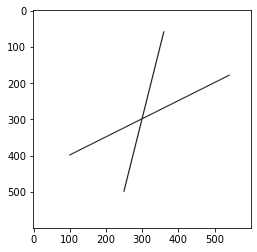

In [14]:
canvas = Canvas(600,600)
canvas.draw_line((-200,-100),(240,120),(0,0,0),2)
canvas.draw_line((-50,-200),(60,240),(0,0,0),2)

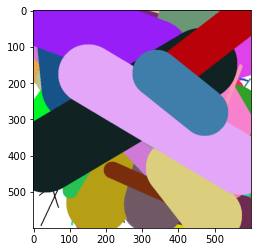

In [24]:
px_low = -300
px_high = 301

color_low = 0
color_high = 256

w_low = 5
w_high = 200

iter_num = 100

for i_n in range(iter_num):
    rand_point = np.random.randint(px_low, high=px_high, size=[4], dtype=int)
    rand_color = np.random.randint(color_low, high=color_high, size=[3], dtype=int)
    rand_width = np.random.randint(w_low, high=w_high, size=[1], dtype=int)
    
    canvas.draw_line((rand_point[0],rand_point[1]),(rand_point[2],rand_point[3]),rand_color,*rand_width)

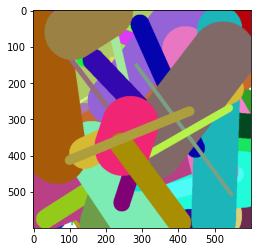

In [25]:
for i_n in range(iter_num):
    rand_point = np.random.randint(px_low, high=px_high, size=[4], dtype=int)
    rand_color = np.random.randint(color_low, high=color_high, size=[3], dtype=int)
    rand_width = np.random.randint(w_low, high=w_high, size=[1], dtype=int)
    
    canvas.draw_line((rand_point[0],rand_point[1]),(rand_point[2],rand_point[3]),rand_color,*rand_width)

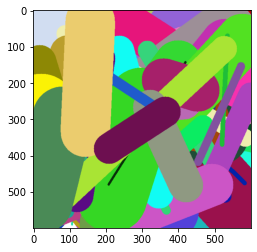

In [26]:
for i_n in range(iter_num):
    rand_point = np.random.randint(px_low, high=px_high, size=[4], dtype=int)
    rand_color = np.random.randint(color_low, high=color_high, size=[3], dtype=int)
    rand_width = np.random.randint(w_low, high=w_high, size=[1], dtype=int)
    
    canvas.draw_line((rand_point[0],rand_point[1]),(rand_point[2],rand_point[3]),rand_color,*rand_width)

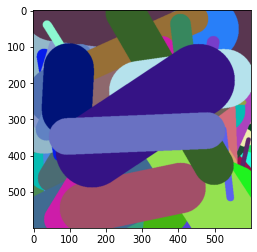

In [27]:
for i_n in range(iter_num):
    rand_point = np.random.randint(px_low, high=px_high, size=[4], dtype=int)
    rand_color = np.random.randint(color_low, high=color_high, size=[3], dtype=int)
    rand_width = np.random.randint(w_low, high=w_high, size=[1], dtype=int)
    
    canvas.draw_line((rand_point[0],rand_point[1]),(rand_point[2],rand_point[3]),rand_color,*rand_width)

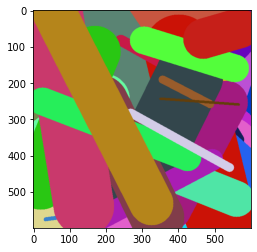

In [28]:
for i_n in range(iter_num):
    rand_point = np.random.randint(px_low, high=px_high, size=[4], dtype=int)
    rand_color = np.random.randint(color_low, high=color_high, size=[3], dtype=int)
    rand_width = np.random.randint(w_low, high=w_high, size=[1], dtype=int)
    
    canvas.draw_line((rand_point[0],rand_point[1]),(rand_point[2],rand_point[3]),rand_color,*rand_width)